In [8]:
versioninfo()

Julia Version 1.6.1
Commit 6aaedecc44 (2021-04-23 05:59 UTC)
Platform Info:
  OS: Windows (x86_64-w64-mingw32)
  CPU: Intel(R) Core(TM) i7-10750H CPU @ 2.60GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-11.0.1 (ORCJIT, skylake)
Environment:
  JULIA_DEPOT_PATH = D:\.julia
  JULIA_NUM_THREADS = 12
  JULIA_PYTHONCALL_EXE = D:\.julia\conda\3\python.exe


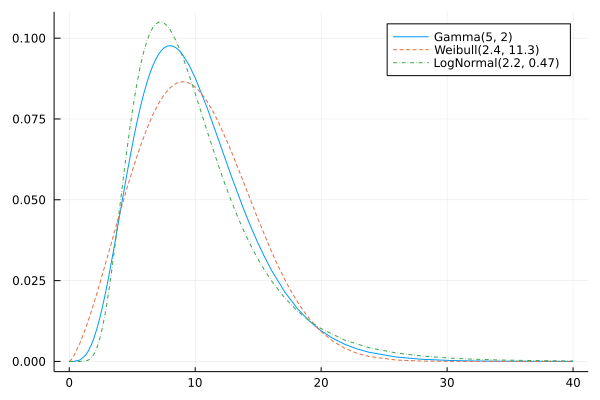

In [1]:
using Distributions, StatsPlots

function aic(model, Y)
    mle = fit_mle(model, Y)
    -2loglikelihood(mle, Y) + 2length(params(mle))
end

function simulate_model_selections(models, truedist, samplesize; niters = 10^4)
    selectedmodel = Vector{Int}(undef, niters)
    Threads.@threads for i in 1:niters
        Y = rand(truedist, samplesize)
        selectedmodel[i] = argmin(aic.(models, Ref(Y)))
    end
    nselected = zeros(Int, 3)
    for i in 1:niters
        nselected[selectedmodel[i]] += 1
    end
    [model => nselected[i]/niters for (i, model) in enumerate(models)]
end

models = (Gamma, Weibull, LogNormal)

a, b = 0, 40
plot(Gamma(5, 2), a, b; label="Gamma(5, 2)")
plot!(Weibull(2.4, 11.3), a, b; label="Weibull(2.4, 11.3)", ls=:dash)
plot!(LogNormal(2.2, 0.47), a, b; label="LogNormal(2.2, 0.47)", ls=:dashdot)

In [2]:
simulate_model_selections(models, Gamma(5, 2), 100; niters = 10^4)

3-element Vector{Pair{UnionAll, Float64}}:
     Gamma => 0.6619
   Weibull => 0.1478
 LogNormal => 0.1903

In [3]:
simulate_model_selections(models, Weibull(2.4, 11.3), 100; niters = 10^4)

3-element Vector{Pair{UnionAll, Float64}}:
     Gamma => 0.1399
   Weibull => 0.8586
 LogNormal => 0.0015

In [4]:
simulate_model_selections(models, LogNormal(2.2, 0.47), 100; niters = 10^4)

3-element Vector{Pair{UnionAll, Float64}}:
     Gamma => 0.1847
   Weibull => 0.0028
 LogNormal => 0.8125